# How do race strategies evolve over a career?
#### * This analysis uses data only from 2024 or earlier. *

## Read and Clean Data

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
sns.set_theme(style='ticks')

# Separating and Reading Data

xlsx = pd.ExcelFile('Track_Project.xlsx')
df_warholm_s = pd.read_excel(xlsx, sheet_name='W_Splits')
df_benjamin_s = pd.read_excel(xlsx, sheet_name='B_Splits')
df_dossantos_s = pd.read_excel(xlsx, sheet_name='DS_Splits')
df_warholm_c = pd.read_excel(xlsx, sheet_name='W_Cumulative')
df_benjamin_c = pd.read_excel(xlsx, sheet_name='B_Cumulative')
df_dossantos_c = pd.read_excel(xlsx, sheet_name='DS_Cumulative')

df_w_splits = df_warholm_s.copy().assign(Athlete='Warholm')
df_b_splits = df_benjamin_s.copy().assign(Athlete='Benjamin')
df_ds_splits = df_dossantos_s.copy().assign(Athlete='dos Santos')
df_splits = pd.concat([df_w_splits,df_b_splits,df_ds_splits],axis=0)
df_splits = df_splits.sort_values(by='Time')

# Setting Up 

athlete_order = ['Warholm','Benjamin','dos Santos']

all_columns = ['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','Run in']
start_phase_columns = ['H1','H2','H3','H4']
mid_phase_columns = ['H5','H6','H7']
end_phase_columns = ['H8','H9','H10','Run in']
df_splits['Start_Phase'] = df_splits[start_phase_columns].mean(axis=1)
df_splits['Mid_Phase'] = df_splits[mid_phase_columns].mean(axis=1)
df_splits['End_Phase'] = df_splits[end_phase_columns].mean(axis=1)
df_splits_2024 = df_splits[df_splits['Year']!=2025]

## Average Time vs. Stride Pattern Consistency (also included in StridePatternAnalysis.ipynb)

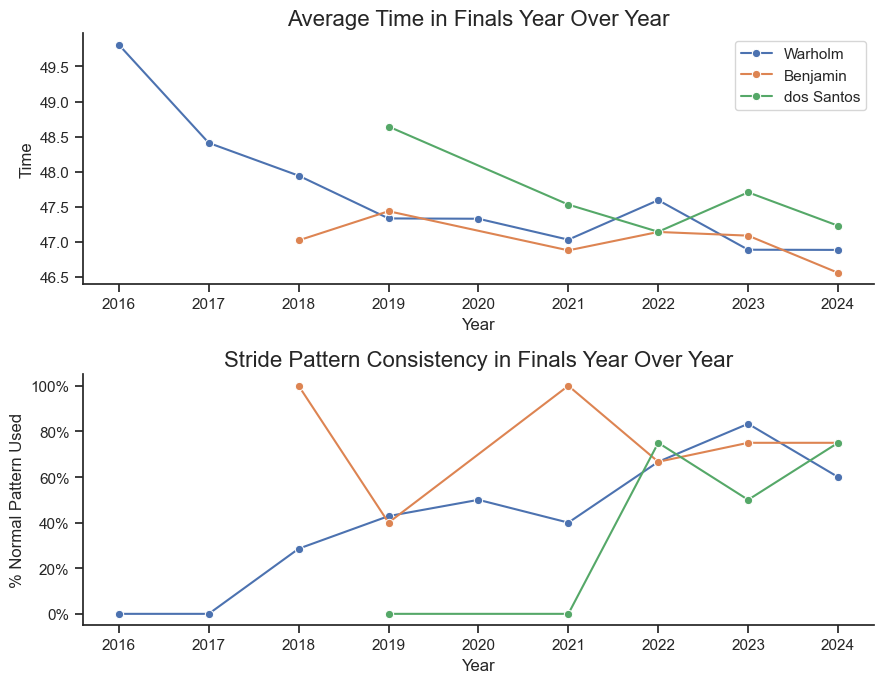

In [2]:
df_splits_stride_sort = df_splits_2024.copy()
normal_patterns = {'Warholm':'13 to 9 15 to 10','Benjamin':'13 to 10','dos Santos':'13 to 2 12 to 6 13 to 10'}
def stridefunc(row):
    athlete=row['Athlete']
    normal_pattern = normal_patterns[athlete]
    return row['Stride Pattern'] == normal_pattern
df_splits_stride_sort['Normal_Stride'] = df_splits_stride_sort.apply(stridefunc,axis=1)
df_splits_stride_sort_finals = df_splits_stride_sort[df_splits_stride_sort['Type']=='final']
df_stride_percents = df_splits_stride_sort_finals.groupby(['Athlete','Year'])[['Normal_Stride']].mean()
df_stride_percents = df_stride_percents.reset_index()
df_stride_percents = df_stride_percents.reindex([12,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21])

df_warholm_s_2024_finals = df_warholm_s[(df_warholm_s['Year']!=2025)&(df_warholm_s['Type']=='final')]
df_benjamin_s_2024_finals = df_benjamin_s[(df_benjamin_s['Year']!=2025)&(df_benjamin_s['Type']=='final')]
df_dossantos_s_2024_finals = df_dossantos_s[(df_dossantos_s['Year']!=2025)&(df_dossantos_s['Type']=='final')]

fig, ax = plt.subplots(2,figsize=(9,7))
sns.lineplot(data=df_warholm_s_2024_finals,x='Year',y='Time', errorbar=None, ax=ax[0], label='Warholm',marker='o')
sns.lineplot(data=df_benjamin_s_2024_finals,x='Year',y='Time', errorbar=None, ax=ax[0], label='Benjamin',marker='o')
sns.lineplot(data=df_dossantos_s_2024_finals,x='Year',y='Time', errorbar=None, ax=ax[0], label='dos Santos',marker='o')
ax[0].set_title('Average Time in Finals Year Over Year',fontsize=16)

sns.lineplot(data=df_stride_percents,x='Year',y='Normal_Stride',hue='Athlete',ax=ax[1],marker='o')
sns.despine()
ax[1].legend().set_visible(False)
ax[1].set_ylabel('% Normal Pattern Used')
ax[1].set_title('Stride Pattern Consistency in Finals Year Over Year',fontsize=16)
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x*100)}%'))
fig.tight_layout()
plt.show()

## Phases Year Over Year

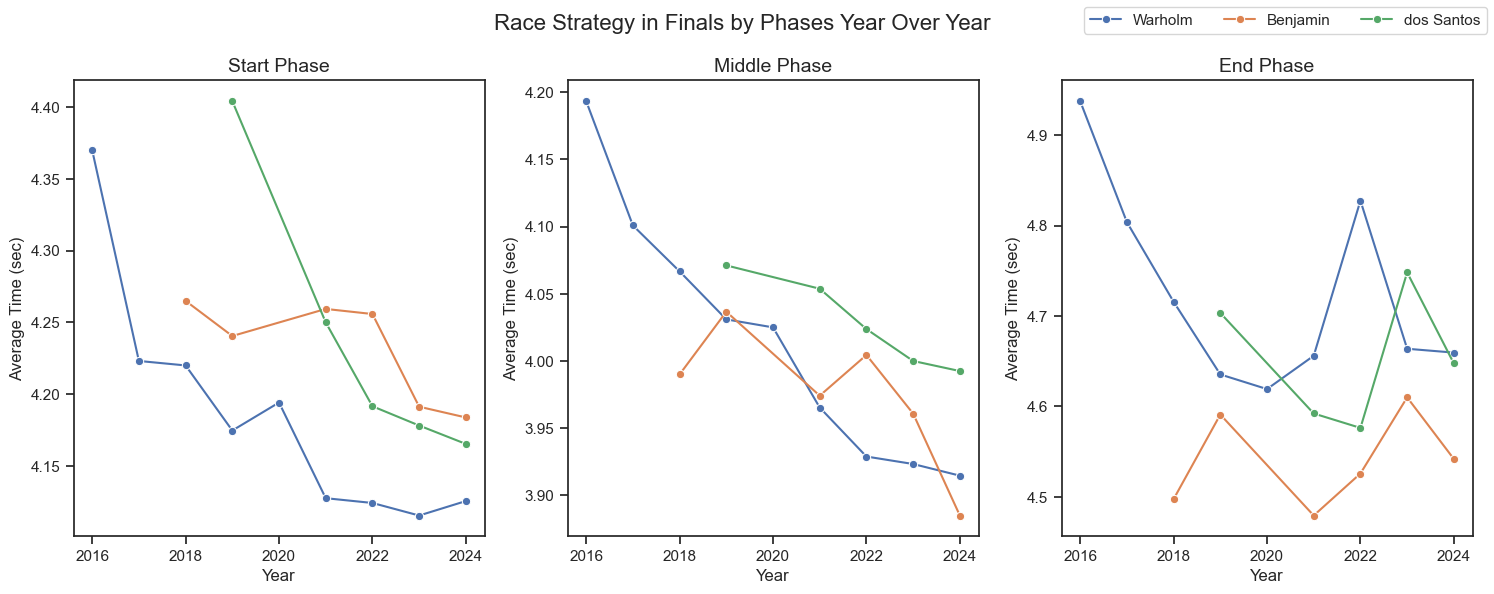

In [5]:
df_splits_2024_finals = df_splits_2024[df_splits_2024['Type']=='final']
fig, ax = plt.subplots(1, 3, figsize=(15,6))
sns.lineplot(data=df_splits_2024_finals,x='Year',y='Start_Phase',hue='Athlete',errorbar=None, marker='o', ax=ax[0])
ax[0].set_ylabel('Average Time (sec)')
ax[0].set_title('Start Phase',fontsize=14)
ax[0].legend().set_visible(False)
sns.lineplot(data=df_splits_2024_finals,x='Year',y='Mid_Phase',hue='Athlete',errorbar=None, marker='o', ax=ax[1])
ax[1].set_ylabel('Average Time (sec)')
ax[1].set_title('Middle Phase',fontsize=14)
ax[1].legend().set_visible(False)
sns.lineplot(data=df_splits_2024_finals,x='Year',y='End_Phase',hue='Athlete',errorbar=None, marker='o', ax=ax[2])
ax[2].set_ylabel('Average Time (sec)')
ax[2].set_title('End Phase',fontsize=14)
ax[2].legend().set_visible(False)
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3)
fig.suptitle('Race Strategy in Finals by Phases Year Over Year',fontsize=16)
fig.tight_layout()
plt.show()